In [48]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Abhi Karkar and Pallavi Swarup
BME 6311
Modeling Project
04/16/21
"""

import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Read in CSV files for model data

Cells_NoChemo = pd.read_csv("Cells_NoChemo.csv")
Cells_Chemo = pd.read_csv("Cells_Chemo.csv")
Wound_NoChemo = pd.read_csv("Wound_NoChemo.csv")
Wound_Chemo = pd.read_csv("Wound_Chemo.csv")
ChemoDose = pd.read_csv("ChemoDose.csv")


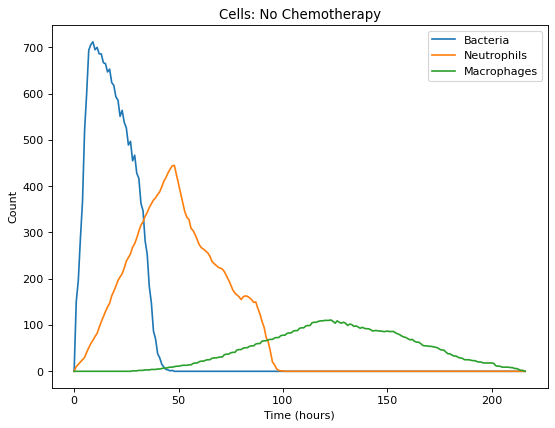

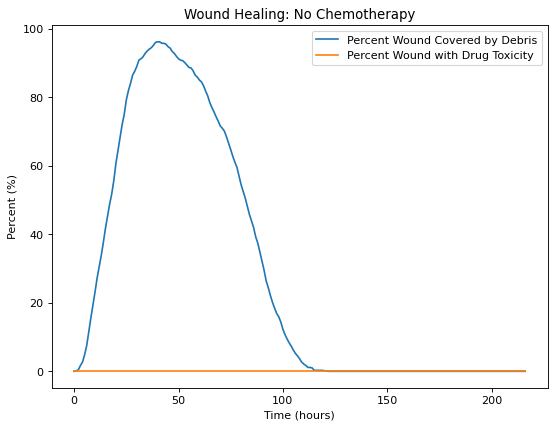

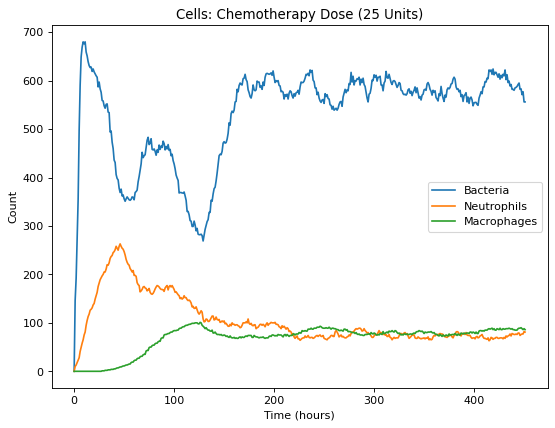

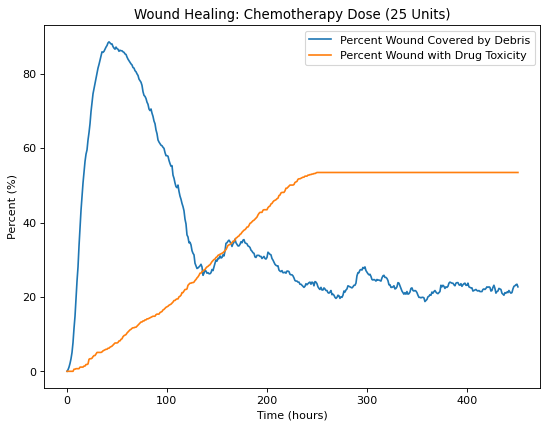

In [14]:
# Figures comparing Chemo vs No Chemo situations under fixed model conditions
plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Cells_NoChemo['Time'], Cells_NoChemo['Bacteria'], label = "Bacteria")
plt.plot(Cells_NoChemo['Time'], Cells_NoChemo['Neutrophils'], label = "Neutrophils")
plt.plot(Cells_NoChemo['Time'], Cells_NoChemo['Macrophages'], label = "Macrophages")
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Cells: No Chemotherapy')
plt.savefig('Cells_NoChemo')

plt.figure(num=2, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Wound_NoChemo['Time'], Wound_NoChemo['Percent Wound'], label = "Percent Wound Covered by Debris")
plt.plot(Wound_NoChemo['Time'], Wound_NoChemo['Percent Toxic'], label = "Percent Wound with Drug Toxicity")
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Percent (%)')
plt.title('Wound Healing: No Chemotherapy')
plt.savefig('Wound_NoChemo')

plt.figure(num=3, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Cells_Chemo['Time'], Cells_Chemo['Bacteria'], label = "Bacteria")
plt.plot(Cells_Chemo['Time'], Cells_Chemo['Neutrophils'], label = "Neutrophils")
plt.plot(Cells_Chemo['Time'], Cells_Chemo['Macrophages'], label = "Macrophages")
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Cells: Chemotherapy Dose (25 Units)')
plt.savefig('Cells_Chemo')

plt.figure(num=4, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Wound_Chemo['Time'], Wound_Chemo['Percent Wound'], label = "Percent Wound Covered by Debris")
plt.plot(Wound_Chemo['Time'], Wound_Chemo['Percent Toxic'], label = "Percent Wound with Drug Toxicity")
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Percent (%)')
plt.title('Wound Healing: Chemotherapy Dose (25 Units)')
plt.savefig('Wound_Chemo')

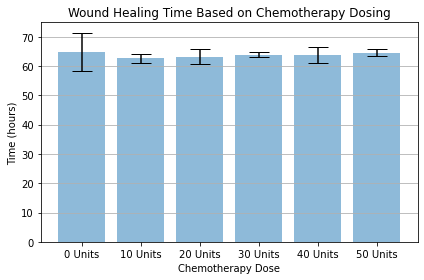

In [55]:
# Calculate data for chemotherapy dose experiments
WH_mean = ChemoDose.iloc[:, 1:].mean(axis=1).values
WH_std = ChemoDose.iloc[:, 1:].std(axis=1).values

# Plot Effect of Chemotherapy Dose on Wound Healing Time
doses =['0 Units', '10 Units', '20 Units', '30 Units', '40 Units', '50 Units']
x_pos = np.arange(len(doses))

fig,ax = plt.subplots()

ax.bar(x_pos, WH_mean, yerr=WH_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Time (hours)')
ax.set_xlabel("Chemotherapy Dose")
ax.set_xticks(x_pos)
ax.set_xticklabels(doses)
ax.set_title('Wound Healing Time Based on Chemotherapy Dosing')
ax.yaxis.grid(True)
plt.tight_layout()
plt.savefig('ChemoDose.png')



In [53]:
# ANOVA Test Comparing Different Chemotherapy Doses and Their Impact on Wound Healing Time

stats.f_oneway(ChemoDose.iloc[0, :], ChemoDose.iloc[1, :], ChemoDose.iloc[2, :], ChemoDose.iloc[3, :], 
               ChemoDose.iloc[4, :], ChemoDose.iloc[5, :])

F_onewayResult(statistic=0.2167366439843637, pvalue=0.9526189838031405)